### Boxcox transformation

Boxcox return a positive dataset transformed by a Box-Cox power transformation. Useful for transforming a skewed continuous non-negative with a non-normal distribution sample into a "more normal" one with less skeweness

*"Another important use of variable transformation is to eliminate skewness and other distributional features that complicate analysis. Often the goal is to find a simple transformation that leads to normality. "*

- 
- How to use Boxcox from scipy https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.boxcox.html

In [44]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data = np.genfromtxt("nonnormal.csv", names=True, delimiter="\n")

Get rid of the negative values by shifting the whole data set to the positive domain

In [58]:
shift = np.abs(np.floor(min(data["x"])))

Original data hist plot

(array([   1.,    0.,    0.,    0.,    0.,    0.,    4.,    1.,    6.,
          10.,   16.,   24.,   36.,   57.,   80.,  105.,  135.,  185.,
         237.,  252.,  215.,  220.,  227.,  451.,  477.,  211.,   34.,
          10.,    3.,    3.]),
 array([-13.02781436, -10.63652586,  -8.24523735,  -5.85394885,
         -3.46266034,  -1.07137184,   1.31991667,   3.71120517,
          6.10249368,   8.49378218,  10.88507069,  13.27635919,
         15.6676477 ,  18.0589362 ,  20.45022471,  22.84151321,
         25.23280171,  27.62409022,  30.01537872,  32.40666723,
         34.79795573,  37.18924424,  39.58053274,  41.97182125,
         44.36310975,  46.75439826,  49.14568676,  51.53697527,
         53.92826377,  56.31955228,  58.71084078]),
 <a list of 30 Patch objects>)

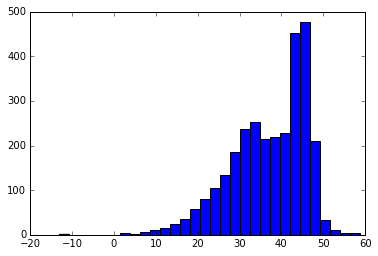

In [46]:
plt.hist(data["x"], bins=30)

In [70]:
labmda_auto = stats.boxcox(data["x"]+shift)[1]
print("The automatic selected lambda is: " + str(round(labmda_auto, 4)))
data_coxbox = stats.boxcox(data["x"]+shift)[0]

The automatic selected lambda is: 2.5962


(array([  67.,  268.,  487.,  536.,  411.,  786.,  404.,   31.,    5.,    5.]),
 array([ -2.72003481e-02,   2.62254366e+03,   5.24511452e+03,
          7.86768539e+03,   1.04902562e+04,   1.31128271e+04,
          1.57353980e+04,   1.83579688e+04,   2.09805397e+04,
          2.36031106e+04,   2.62256814e+04]),
 <a list of 10 Patch objects>)

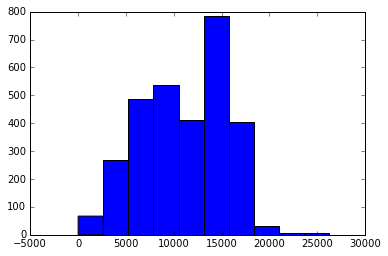

In [71]:
plt.hist(data_coxbox)

In [80]:
def reverse_boxcox(data, lambda_, shift):
    result = ((data*lambda_)+1,lambda_) ** (1/lambda_) - shift
    return result

(array([   1.,    0.,    0.,    0.,    0.,    0.,    4.,    1.,    6.,
          10.,   16.,   24.,   36.,   57.,   80.,  105.,  135.,  185.,
         237.,  252.,  215.,  220.,  227.,  451.,  477.,  211.,   34.,
          10.,    3.,    3.]),
 array([-13.02781436, -10.63652586,  -8.24523735,  -5.85394885,
         -3.46266034,  -1.07137184,   1.31991667,   3.71120517,
          6.10249368,   8.49378218,  10.88507069,  13.27635919,
         15.6676477 ,  18.0589362 ,  20.45022471,  22.84151321,
         25.23280171,  27.62409022,  30.01537872,  32.40666723,
         34.79795573,  37.18924424,  39.58053274,  41.97182125,
         44.36310975,  46.75439826,  49.14568676,  51.53697527,
         53.92826377,  56.31955228,  58.71084078]),
 <a list of 30 Patch objects>)

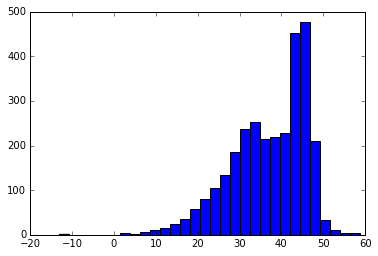

In [81]:
testd = reverse_boxcox(data_coxbox, labmda_auto, shift)
plt.hist(testd[0], bins=30)